In [1]:
import os
import pandas as pd
import requests

Step 1: Load Excel file
excel_path = "/content/Assignment Data.xlsx"  # Replace with your file path
data = pd.read_excel(excel_path)

# Step 2: Create a directory to store the videos
dataset_folder = "/content/drive/MyDrive/assi_Data_video/video_dataset"
os.makedirs(dataset_folder, exist_ok=True)

# Step 3: Prepare a list for metadata
metadata = []

# Step 4: Loop through the data and download videos
for index, row in data.iterrows():
    score = row['Performance']  # Adjust column name to match Excel
    video_url = row['Video URL']  # Adjust column name to match Excel

    try:
        # Download video using requests
        video_filename = f"{index}_video.mp4"
        video_path = os.path.join(dataset_folder, video_filename)

        # Stream and save video
        with requests.get(video_url, stream=True) as response:
            response.raise_for_status()  # Raise an error for bad status codes
            with open(video_path, "wb") as video_file:
                for chunk in response.iter_content(chunk_size=8192):  # Download in chunks
                    video_file.write(chunk)

        # Append to metadata
        metadata.append({"video_path": video_path, "score": score})
        print(f"Downloaded: {video_filename}")

    except Exception as e:
        print(f"Error downloading video from {video_url}: {e}")

# Step 5: Save metadata to a CSV file
metadata_file = os.path.join(dataset_folder, "metadata.csv")
pd.DataFrame(metadata).to_csv(metadata_file, index=False)
print(f"Metadata saved at: {metadata_file}")


In [2]:
import pandas as pd

# Load the existing metadata file
metadata_path = "/content/drive/MyDrive/assi_Data_video/video_dataset/metadata.csv"
metadata = pd.read_csv(metadata_path)

# Extract only the file names from the full paths
metadata['video_name'] = metadata['video_path'].apply(lambda x: os.path.basename(x))

# Remove the old 'video_path' column and reorder columns
metadata = metadata[['video_name', 'score']]

# Save the updated metadata
updated_metadata_path = "/content/drive/MyDrive/assi_Data_video/video_dataset/updated_metadata.csv"
metadata.to_csv(updated_metadata_path, index=False)
print(f"Updated metadata saved at: {updated_metadata_path}")


Updated metadata saved at: /content/drive/MyDrive/assi_Data_video/video_dataset/updated_metadata.csv


In [3]:
pip install face_recognition opencv-python-headless pandas deepface moviepy imagehash scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 9.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 30.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 82.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 110.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 70.7 MB/s eta 0:00:00
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566162 sha256=a6d9183b87ed021a5f657a7e8fe813dd15115fb46fe9748576b13591590d49d7
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cf

In [4]:
import os
import cv2
import numpy as np
import pandas as pd
from moviepy.editor import VideoFileClip
import face_recognition
from sklearn.cluster import DBSCAN
from collections import defaultdict
from PIL import Image
import imagehash


  if event.key is 'enter':



In [5]:
def extract_video_hash(video_path):
    """Generate a perceptual hash for a video based on its frames."""
    video = cv2.VideoCapture(video_path)
    frame_hashes = []
    frame_count = 0

    while True:
        ret, frame = video.read()
        if not ret:
            break
        frame_count += 1

        # Sample one frame every 30 frames
        if frame_count % 30 == 0:
            frame = cv2.resize(frame, (200, 200))  # Resize for uniform hashing
            frame_hashes.append(str(imagehash.phash(Image.fromarray(frame))))

    video.release()
    return "".join(frame_hashes)

def remove_duplicates(video_paths):
    """Remove duplicate videos based on hash comparison."""
    seen_hashes = set()
    unique_videos = []

    for video_path in video_paths:
        video_hash = extract_video_hash(video_path)
        if video_hash not in seen_hashes:
            seen_hashes.add(video_hash)
            unique_videos.append(video_path)

    return unique_videos


In [6]:
metadata_file = "/content/drive/MyDrive/assi_Data_video/video_dataset/metadata.csv"
metadata = pd.read_csv(metadata_file)

video_paths = metadata['video_path'].tolist()
scores = metadata['score'].tolist()

# Step 1: Remove duplicates
unique_videos = remove_duplicates(video_paths)

# Step 2: Extract faces and recognize unique influencers
influencer_data = []
all_encodings = []



In [7]:
import os
import shutil

# Path to the folder where unique videos will be saved
unique_videos_folder = "/content/drive/MyDrive/assi_Data_video/unique_videos"
os.makedirs(unique_videos_folder, exist_ok=True)  # Create the folder if it doesn't exist

# Copy each unique video to the new folder
for video_path in unique_videos:
    video_name = os.path.basename(video_path)  # Extract the video file name
    destination_path = os.path.join(unique_videos_folder, video_name)  # Define the destination path
    shutil.copy(video_path, destination_path)  # Copy the video file
    print(f"Copied {video_name} to {unique_videos_folder}")

print("All unique videos have been saved to the new folder.")

Copied 0_video.mp4 to /content/drive/MyDrive/assi_Data_video/unique_videos
Copied 1_video.mp4 to /content/drive/MyDrive/assi_Data_video/unique_videos
Copied 2_video.mp4 to /content/drive/MyDrive/assi_Data_video/unique_videos
Copied 3_video.mp4 to /content/drive/MyDrive/assi_Data_video/unique_videos
Copied 5_video.mp4 to /content/drive/MyDrive/assi_Data_video/unique_videos
Copied 6_video.mp4 to /content/drive/MyDrive/assi_Data_video/unique_videos
Copied 7_video.mp4 to /content/drive/MyDrive/assi_Data_video/unique_videos
Copied 11_video.mp4 to /content/drive/MyDrive/assi_Data_video/unique_videos
Copied 12_video.mp4 to /content/drive/MyDrive/assi_Data_video/unique_videos
Copied 14_video.mp4 to /content/drive/MyDrive/assi_Data_video/unique_videos
Copied 15_video.mp4 to /content/drive/MyDrive/assi_Data_video/unique_videos
Copied 18_video.mp4 to /content/drive/MyDrive/assi_Data_video/unique_videos
Copied 23_video.mp4 to /content/drive/MyDrive/assi_Data_video/unique_videos
Copied 24_video.mp4

In [9]:
import cv2
import face_recognition
import os
import numpy as np

# Initialize variables to store unique data
influencer_data = []  # Stores unique influencer data: (video, encoding, image)
all_encodings = []    # Stores unique face encodings for comparison

# Output folder for saving unique faces
output_folder = "/content/drive/MyDrive/assi_Data_video/unique_faces"
os.makedirs(output_folder, exist_ok=True)  # Create the folder if it doesn't exist

# Define a similarity threshold for face comparison
SIMILARITY_THRESHOLD = 0.6

# Helper function to check if a face is unique
def is_unique_face(new_encoding, existing_encodings, threshold=SIMILARITY_THRESHOLD):
    if not existing_encodings:
        return True  # If no existing encodings, the face is unique
    distances = face_recognition.face_distance(existing_encodings, new_encoding)
    return all(distance > threshold for distance in distances)

# Process each video
for video_index, video in enumerate(unique_videos):
    cap = cv2.VideoCapture(video)
    frame_count = 0  # Initialize frame counter

    while True:
        ret, frame = cap.read()  # Read a frame
        if not ret:  # Break if no more frames
            break

        frame_count += 1

        # Skip every 10 frames
        if frame_count % 10 != 0:
            continue

        # Convert frame to RGB for face_recognition
        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Detect face locations in the frame
        face_locations = face_recognition.face_locations(rgb_frame)

        for face_index, location in enumerate(face_locations):
            try:
                # Extract encoding for the detected face
                encoding = face_recognition.face_encodings(rgb_frame, [location])[0]

                # Check if the face is unique
                if is_unique_face(encoding, all_encodings):
                    all_encodings.append(encoding)

                    # Crop the unique face from the frame
                    top, right, bottom, left = location
                    face_image = frame[top:bottom, left:right]

                    # Save the unique face image
                    face_filename = f"video{video_index + 1}_face{len(all_encodings)}.jpg"
                    face_path = os.path.join(output_folder, face_filename)
                    cv2.imwrite(face_path, face_image)
                    print(f"Saved unique face {len(all_encodings)} from Video {video_index + 1} as {face_path}")

                    # Add to influencer data for further analysis
                    influencer_data.append((video, encoding, face_path))
            except Exception as e:
                print(f"Error processing face {face_index + 1} from Video {video_index + 1}, Frame {frame_count}: {e}")

    cap.release()  # Release the video capture object

# Summary
print(f"Total unique faces saved: {len(all_encodings)}")
print(f"Unique face images are saved in {output_folder}")


Saved unique face 1 from Video 1 as /content/drive/MyDrive/assi_Data_video/unique_faces/video1_face1.jpg
Saved unique face 2 from Video 1 as /content/drive/MyDrive/assi_Data_video/unique_faces/video1_face2.jpg
Saved unique face 3 from Video 1 as /content/drive/MyDrive/assi_Data_video/unique_faces/video1_face3.jpg
Saved unique face 4 from Video 3 as /content/drive/MyDrive/assi_Data_video/unique_faces/video3_face4.jpg
Saved unique face 5 from Video 3 as /content/drive/MyDrive/assi_Data_video/unique_faces/video3_face5.jpg
Saved unique face 6 from Video 3 as /content/drive/MyDrive/assi_Data_video/unique_faces/video3_face6.jpg
Saved unique face 7 from Video 3 as /content/drive/MyDrive/assi_Data_video/unique_faces/video3_face7.jpg
Saved unique face 8 from Video 4 as /content/drive/MyDrive/assi_Data_video/unique_faces/video4_face8.jpg
Saved unique face 9 from Video 4 as /content/drive/MyDrive/assi_Data_video/unique_faces/video4_face9.jpg
Saved unique face 10 from Video 4 as /content/drive/MyD

In [ ]:
import cv2
import face_recognition
import os
import numpy as np

# Initialize variables to store unique data
influencer_data = []  # Stores unique influencer data: (video, encoding, image)
all_encodings = []    # Stores unique face encodings for comparison

# Output folder for saving unique faces
output_folder = "/content/drive/MyDrive/assi_Data_video/new_unique_faces"
os.makedirs(output_folder, exist_ok=True)  # Create the folder if it doesn't exist

# Define a similarity threshold for face comparison
SIMILARITY_THRESHOLD = 0.6

# Helper function to check if a face is unique
def is_unique_face(new_encoding, existing_encodings, threshold=SIMILARITY_THRESHOLD):
    if not existing_encodings:
        return True  # If no existing encodings, the face is unique
    distances = face_recognition.face_distance(existing_encodings, new_encoding)
    return all(distance > threshold for distance in distances)

# Process each video
for video_index, video in enumerate(unique_videos):
    original_video_name = os.path.basename(video).split(".")[0]  # Extract original video name
    cap = cv2.VideoCapture(video)
    frame_count = 0  # Initialize frame counter

    while True:
        ret, frame = cap.read()  # Read a frame
        if not ret:  # Break if no more frames
            break

        frame_count += 1

        # Skip every 10 frames
        if frame_count % 10 != 0:
            continue

        # Convert frame to RGB for face_recognition
        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Detect face locations in the frame
        face_locations = face_recognition.face_locations(rgb_frame)

        for face_index, location in enumerate(face_locations):
            try:
                # Extract encoding for the detected face
                encoding = face_recognition.face_encodings(rgb_frame, [location])[0]

                # Check if the face is unique
                if is_unique_face(encoding, all_encodings):
                    all_encodings.append(encoding)

                    # Crop the unique face from the frame
                    top, right, bottom, left = location
                    face_image = frame[top:bottom, left:right]

                    # Save the unique face image with the original video name
                    face_filename = f"{original_video_name}_face{len(all_encodings)}.jpg"
                    face_path = os.path.join(output_folder, face_filename)
                    cv2.imwrite(face_path, face_image)
                    print(f"Saved unique face {len(all_encodings)} from {original_video_name} as {face_path}")

                    # Add to influencer data for further analysis
                    influencer_data.append((video, encoding, face_path))
            except Exception as e:
                print(f"Error processing face {face_index + 1} from {original_video_name}, Frame {frame_count}: {e}")

    cap.release()  # Release the video capture object

# Summary
print(f"Total unique faces saved: {len(all_encodings)}")
print(f"Unique face images are saved in {output_folder}")


Saved unique face 1 from 0_video as /content/drive/MyDrive/assi_Data_video/new_unique_faces/0_video_face1.jpg
Saved unique face 2 from 0_video as /content/drive/MyDrive/assi_Data_video/new_unique_faces/0_video_face2.jpg
Saved unique face 3 from 0_video as /content/drive/MyDrive/assi_Data_video/new_unique_faces/0_video_face3.jpg
Saved unique face 4 from 2_video as /content/drive/MyDrive/assi_Data_video/new_unique_faces/2_video_face4.jpg
Saved unique face 5 from 2_video as /content/drive/MyDrive/assi_Data_video/new_unique_faces/2_video_face5.jpg
Saved unique face 6 from 2_video as /content/drive/MyDrive/assi_Data_video/new_unique_faces/2_video_face6.jpg
Saved unique face 7 from 2_video as /content/drive/MyDrive/assi_Data_video/new_unique_faces/2_video_face7.jpg
Saved unique face 8 from 3_video as /content/drive/MyDrive/assi_Data_video/new_unique_faces/3_video_face8.jpg
Saved unique face 9 from 3_video as /content/drive/MyDrive/assi_Data_video/new_unique_faces/3_video_face9.jpg
Saved uniq

In [ ]:
import os
import cv2
import numpy as np
from sklearn.cluster import DBSCAN
import face_recognition


def extract_face_embeddings(face_images):
    """
    Extract embeddings for a list of face images using face_recognition.

    Args:
        face_images (list): List of face images as NumPy arrays.

    Returns:
        list: List of face embeddings.
    """
    embeddings = []
    for face_image in face_images:
        face_rgb = cv2.cvtColor(face_image, cv2.COLOR_BGR2RGB)
        encodings = face_recognition.face_encodings(face_rgb)
        if encodings:
            embeddings.append(encodings[0])
    return embeddings


def cluster_faces(embeddings, eps=0.5, min_samples=2):
    """
    Cluster face embeddings using DBSCAN.

    Args:
        embeddings (list): List of face embeddings.
        eps (float): DBSCAN maximum distance between points in a cluster.
        min_samples (int): Minimum number of samples in a cluster.

    Returns:
        list: Cluster labels for each embedding.
    """
    if len(embeddings) == 0:
        return []

    clustering_model = DBSCAN(eps=eps, min_samples=min_samples, metric="euclidean")
    labels = clustering_model.fit_predict(embeddings)
    return labels


def group_faces(face_paths, output_folder):
    """
    Group similar faces into folders.

    Args:
        face_paths (list): List of file paths to face images.
        output_folder (str): Path to save grouped faces.
    """
    # Load face images
    face_images = [cv2.imread(path) for path in face_paths]

    # Extract embeddings
    embeddings = extract_face_embeddings(face_images)

    # Cluster embeddings
    labels = cluster_faces(embeddings)

    # Group faces by cluster
    clusters = {}
    for idx, label in enumerate(labels):
        if label == -1:  # Ignore outliers
            continue
        if label not in clusters:
            clusters[label] = []
        clusters[label].append(face_paths[idx])

    # Save grouped faces
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for cluster_id, cluster_data in clusters.items():
        cluster_folder = os.path.join(output_folder, f"cluster_{cluster_id}")
        os.makedirs(cluster_folder, exist_ok=True)

        for face_path in cluster_data:
            face_filename = os.path.basename(face_path)
            cluster_face_path = os.path.join(cluster_folder, face_filename)
            cv2.imwrite(cluster_face_path, cv2.imread(face_path))


# Example Usage
face_image_paths = ["face1.jpg", "face2.jpg", "face3.jpg"]  # Replace with actual face image paths
output_folder = "grouped_faces"

group_faces(face_image_paths, output_folder)


In [3]:
import pandas as pd

# Path to the CSV file
csv_file = '/content/drive/MyDrive/assi_Data_video/video_dataset/updated_metadata.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(csv_file)

# Inspect the data
print(df.head())


    video_name   score
0  0_video.mp4  1.1060
1  1_video.mp4  2.2447
2  2_video.mp4  2.0126
3  3_video.mp4  1.7708
4  4_video.mp4  0.6293


In [8]:
import os

# Path to the folder containing face images
faces_folder = '/content/drive/MyDrive/assi_Data_video/new_unique_faces'

# List all files in the folder
face_files = os.listdir(faces_folder)

# Extract video IDs from face filenames
face_data = []
for face_file in face_files:
    if "video" in face_file:
        video_id = face_file.split('_')[0].replace('video', '')  # Extract video ID
        face_path = os.path.join(faces_folder, face_file)  # Full path to face image
        face_data.append({'video_id': video_id, 'face_path': face_path})

# Convert to a DataFrame
face_df = pd.DataFrame(face_data)

# Inspect the extracted data
print(face_df.head())


  video_id                                          face_path
0        0  /content/drive/MyDrive/assi_Data_video/new_uni...
1        0  /content/drive/MyDrive/assi_Data_video/new_uni...
2        0  /content/drive/MyDrive/assi_Data_video/new_uni...
3        2  /content/drive/MyDrive/assi_Data_video/new_uni...
4        2  /content/drive/MyDrive/assi_Data_video/new_uni...


In [6]:
print(df['video_name'].unique())


['0_video' '1_video' '2_video' '3_video' '4_video' '5_video' '6_video'
 '7_video' '8_video' '9_video' '10_video' '11_video' '12_video' '13_video'
 '14_video' '15_video' '16_video' '17_video' '18_video' '19_video'
 '20_video' '21_video' '22_video' '23_video' '24_video' '25_video'
 '26_video' '27_video' '28_video' '29_video' '30_video' '31_video'
 '32_video' '33_video' '34_video' '35_video' '36_video' '37_video'
 '38_video' '39_video' '40_video' '41_video' '42_video' '43_video'
 '44_video' '45_video' '46_video' '47_video' '48_video' '49_video'
 '50_video' '51_video' '52_video' '53_video' '54_video' '55_video'
 '56_video' '57_video' '58_video' '59_video' '60_video' '61_video'
 '62_video' '63_video' '64_video' '65_video' '66_video' '67_video'
 '68_video' '69_video' '70_video' '71_video' '72_video' '73_video'
 '74_video' '75_video' '76_video' '77_video' '78_video' '79_video'
 '80_video' '81_video' '82_video' '83_video' '84_video' '85_video'
 '86_video' '87_video' '88_video' '89_video' '90_v

In [10]:
print(face_df['video_id'].unique())


['0' '2' '3' '6' '7' '11' '15' '23' '25' '26' '30' '50' '57' '82' '95'
 '154' '167' '170' '202' '207' '251' '253' '254']


In [11]:
# Adjust video ID extraction to match CSV format
face_data = []
for face_file in face_files:
    if "video" in face_file:
        video_id = face_file.split('_')[0].replace('video', '')  # Extract video ID
        video_id = video_id.lstrip('0')  # Remove leading zeros
        face_path = os.path.join(faces_folder, face_file)
        face_data.append({'video_id': video_id, 'face_path': face_path})

face_df = pd.DataFrame(face_data)

# Print the unique video IDs to verify
print(face_df['video_id'].unique())


['' '2' '3' '6' '7' '11' '15' '23' '25' '26' '30' '50' '57' '82' '95'
 '154' '167' '170' '202' '207' '251' '253' '254']


In [15]:
# Remove leading zeros from video_name
df['video_name'] = df['video_name'].str.replace('.mp4', '').str.replace('_', '').str.replace('_video', '').astype(str)
df['video_name'] = df['video_name'].str.lstrip('0')
print(df['video_name'].unique())  # Check the result


['' '1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15' '16'
 '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '27' '28' '29' '30'
 '31' '32' '33' '34' '35' '36' '37' '38' '39' '40' '41' '42' '43' '44'
 '45' '46' '47' '48' '49' '50' '51' '52' '53' '54' '55' '56' '57' '58'
 '59' '60' '61' '62' '63' '64' '65' '66' '67' '68' '69' '70' '71' '72'
 '73' '74' '75' '76' '77' '78' '79' '80' '81' '82' '83' '84' '85' '86'
 '87' '88' '89' '90' '91' '92' '93' '94' '95' '96' '97' '98' '99' '100'
 '101' '102' '103' '104' '105' '106' '107' '108' '109' '110' '111' '112'
 '113' '114' '115' '116' '117' '118' '119' '120' '121' '122' '123' '124'
 '125' '126' '127' '128' '129' '130' '131' '132' '133' '134' '135' '136'
 '137' '138' '139' '140' '141' '142' '143' '144' '145' '146' '147' '148'
 '149' '150' '151' '152' '153' '154' '155' '156' '157' '158' '159' '160'
 '161' '162' '163' '164' '165' '166' '167' '168' '169' '170' '171' '172'
 '173' '174' '175' '176' '177' '178' '179' '180' '181' '182'

In [16]:
# Ensure video IDs in both DataFrames are strings
df['video_name'] = df['video_name'].str.replace('.mp4', '')  # Clean video names
df['video_name'] = df['video_name'].astype(str)
face_df['video_id'] = face_df['video_id'].astype(str)

# Merge face data with the scores DataFrame
merged_df = face_df.merge(df, left_on='video_id', right_on='video_name', how='inner')

# Inspect the merged data
print(merged_df.head())


  video_id                                          face_path video_name  \
0           /content/drive/MyDrive/assi_Data_video/new_uni...              
1           /content/drive/MyDrive/assi_Data_video/new_uni...              
2           /content/drive/MyDrive/assi_Data_video/new_uni...              
3        2  /content/drive/MyDrive/assi_Data_video/new_uni...          2   
4        2  /content/drive/MyDrive/assi_Data_video/new_uni...          2   

    score  
0  1.1060  
1  1.1060  
2  1.1060  
3  2.0126  
4  2.0126  


In [17]:
# Calculate average performance for each unique face
result = merged_df.groupby('face_path')['score'].mean().reset_index()
result.rename(columns={'score': 'average_performance'}, inplace=True)

# Inspect the result
print(result.head())


                                           face_path  average_performance
0  /content/drive/MyDrive/assi_Data_video/new_uni...             1.106000
1  /content/drive/MyDrive/assi_Data_video/new_uni...             1.106000
2  /content/drive/MyDrive/assi_Data_video/new_uni...             1.106000
3  /content/drive/MyDrive/assi_Data_video/new_uni...             1.500900
4  /content/drive/MyDrive/assi_Data_video/new_uni...             1.161329


Face: 0_video_face1.jpg, Average Performance: 1.11


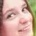

Face: 0_video_face2.jpg, Average Performance: 1.11


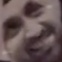

Face: 0_video_face3.jpg, Average Performance: 1.11


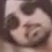

Face: 11_video_face13.jpg, Average Performance: 1.50


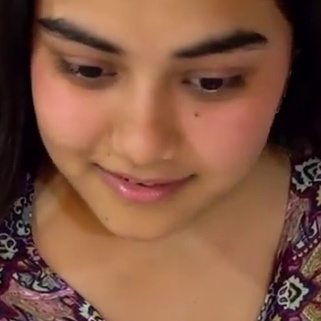

Face: 154_video_face34.jpg, Average Performance: 1.16


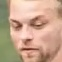

Face: 15_video_face14.jpg, Average Performance: 2.26


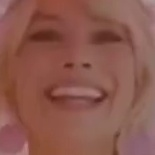

Face: 15_video_face15.jpg, Average Performance: 2.26


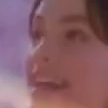

Face: 15_video_face16.jpg, Average Performance: 2.26


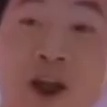

Face: 15_video_face17.jpg, Average Performance: 2.26


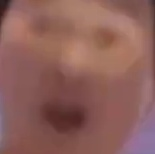

Face: 167_video_face35.jpg, Average Performance: 0.99


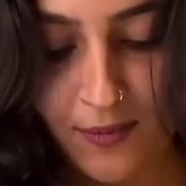

Face: 170_video_face36.jpg, Average Performance: 0.22


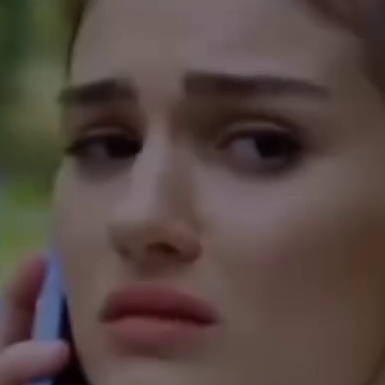

Face: 170_video_face37.jpg, Average Performance: 0.22


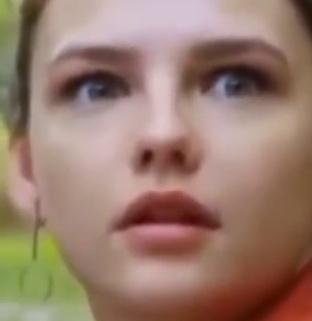

Face: 170_video_face38.jpg, Average Performance: 0.22


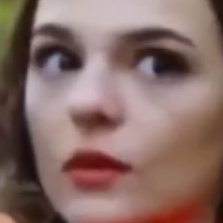

Face: 202_video_face39.jpg, Average Performance: 1.05


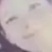

Face: 207_video_face40.jpg, Average Performance: 0.10


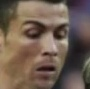

Face: 23_video_face18.jpg, Average Performance: 0.55


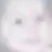

Face: 23_video_face19.jpg, Average Performance: 0.55


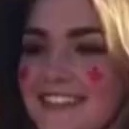

Face: 23_video_face20.jpg, Average Performance: 0.55


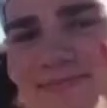

Face: 23_video_face21.jpg, Average Performance: 0.55


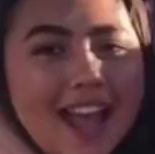

Face: 23_video_face22.jpg, Average Performance: 0.55


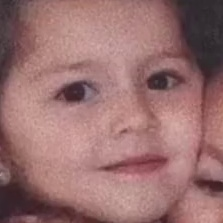

Face: 23_video_face23.jpg, Average Performance: 0.55


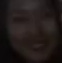

Face: 23_video_face24.jpg, Average Performance: 0.55


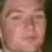

Face: 251_video_face41.jpg, Average Performance: 0.71


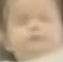

Face: 251_video_face42.jpg, Average Performance: 0.71


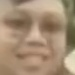

Face: 251_video_face43.jpg, Average Performance: 0.71


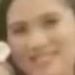

Face: 253_video_face44.jpg, Average Performance: 1.79


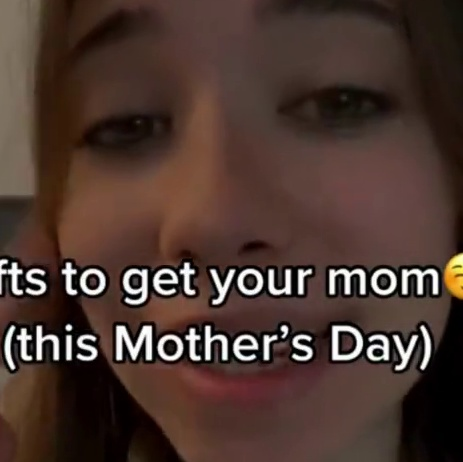

Face: 254_video_face45.jpg, Average Performance: 1.50


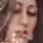

Face: 25_video_face25.jpg, Average Performance: 0.38


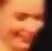

Face: 26_video_face26.jpg, Average Performance: 0.31


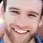

Face: 2_video_face4.jpg, Average Performance: 2.01


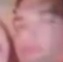

Face: 2_video_face5.jpg, Average Performance: 2.01


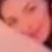

Face: 2_video_face6.jpg, Average Performance: 2.01


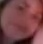

Face: 2_video_face7.jpg, Average Performance: 2.01


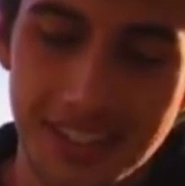

Face: 30_video_face27.jpg, Average Performance: 0.68


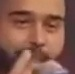

Face: 30_video_face28.jpg, Average Performance: 0.68


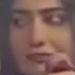

Face: 3_video_face10.jpg, Average Performance: 1.77


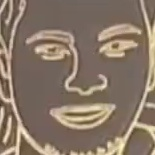

Face: 3_video_face8.jpg, Average Performance: 1.77


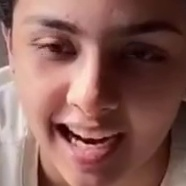

Face: 3_video_face9.jpg, Average Performance: 1.77


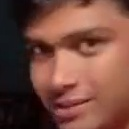

Face: 50_video_face29.jpg, Average Performance: 0.52


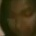

Face: 57_video_face30.jpg, Average Performance: 1.33


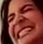

Face: 6_video_face11.jpg, Average Performance: 2.26


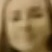

Face: 7_video_face12.jpg, Average Performance: 1.12


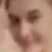

Face: 82_video_face31.jpg, Average Performance: 1.53


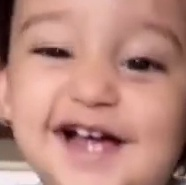

Face: 95_video_face32.jpg, Average Performance: 0.24


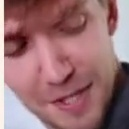

Face: 95_video_face33.jpg, Average Performance: 0.24


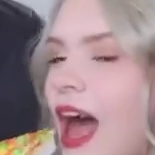

In [18]:
from IPython.display import Image, display

# Display images with their average performance
for _, row in result.iterrows():
    print(f"Face: {os.path.basename(row['face_path'])}, Average Performance: {row['average_performance']:.2f}")
    display(Image(filename=row['face_path']))


In [20]:
import pandas as pd
import os

# Assuming `merged_df` exists with these columns: face_path, video_id, score
# Example `merged_df` (replace this with your actual merged_df):
# merged_df = pd.DataFrame({
#     'face_path': ['path/to/video22_face3.jpg', 'path/to/video213_face11.jpg'],
#     'video_id': [22, 213],
#     'score': [85.4, 78.6]
# })

# Group by `face_path` and calculate the average performance score
average_df = (
    merged_df.groupby("face_path", as_index=False)
    .agg(average_performance=("score", "mean"))
)

# Convert DataFrame into an HTML table with embedded images
html_rows = []
for _, row in average_df.iterrows():
    face_image_path = row['face_path']
    avg_performance = row['average_performance']

    # Ensure the file exists before adding it to the HTML table
    if os.path.exists(face_image_path):
        html_rows.append(f"""
        <tr>
            <td><img src="{face_image_path}" alt="Face" style="width:100px;height:auto;"></td>
            <td>{avg_performance:.2f}</td>
        </tr>
        """)
    else:
        print(f"Warning: Image {face_image_path} not found. Skipping it in the table.")

# Combine rows into an HTML table
html_table = f"""
<html>
<head><style>
    table, th, td {{border: 1px solid black; border-collapse: collapse;}}
    th, td {{padding: 10px; text-align: center;}}
</style></head>
<body>
<h2>Average Performance Table</h2>
<table>
    <tr>
        <th>Face Image</th>
        <th>Average Performance</th>
    </tr>
    {''.join(html_rows)}
</table>
</body>
</html>
"""

# Save the HTML table
output_html_file = "faces_performance_table.html"
with open(output_html_file, "w") as f:
    f.write(html_table)
print(f"HTML table saved as {output_html_file}")

# Save the DataFrame as a CSV
output_csv_file = "faces_performance_table.csv"
average_df.to_csv(output_csv_file, index=False)
print(f"CSV saved as {output_csv_file}")


HTML table saved as faces_performance_table.html
CSV saved as faces_performance_table.csv


In [21]:
!python3 -m http.server 8000


Serving HTTP on 0.0.0.0 port 8000 (http://0.0.0.0:8000/) ...

Keyboard interrupt received, exiting.
